In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import cv2
from unified_planning.shortcuts import *

In [2]:

initial_img = 'legoscatter.png'
im = cv2.imread(initial_img, cv2.IMREAD_COLOR_RGB)

In [3]:
#Claude Output
C_robot = [0,0]
C_P1 = [-6,8]
C_P2 = [-8,2]
C_P3 = [-2,4]
C_P4 = [4,6]
C_R1 = [6,0]
C_R2 = [-4,-7]
C_R3 = [7,-8]
C_G1 = [2,2]
C_G2 = [0,-4]


claude_x_points = [C_P1[0],C_P2[0],C_P3[0],C_P4[0],C_R1[0],C_R2[0],C_R3[0],C_G1[0],C_G2[0]]
claude_y_points = [C_P1[1],C_P2[1],C_P3[1],C_P4[1],C_R1[1],C_R2[1],C_R3[1],C_G1[1],C_G2[1]]

In [4]:
#Gemini Output
robot = [0,0]
P1 = [-3.33,8.75]
P2 = [6.66,7.5]
P3 = [-6.66,1.25]
P4 = [-3.33,3.75]
R1 = [8.33,-1.25]
R2 = [-8.33,-7.5]
R3 = [6.66,-8.75]
G1 = [1.66,3.75]
G2 = [0,-2.5]

gem_x_points = [P1[0],P2[0],P3[0],P4[0],R1[0],R2[0],R3[0],G1[0],G2[0]]
gem_y_points = [P1[1],P2[1],P3[1],P4[1],R1[1],R2[1],R3[1],G1[1],G2[1]]

In [5]:
#GPT Output

robot = [0,0]
P1 = [-5.29,6.26]
P2 = [-2.25,1.89]
P3 = [-5.88,-2.94]
# P4 = [5,-3.66]
R1 = [6.08,-2.74]
R2 = [-5.88,-8.04]
R3 = [5.29,1.86]
G1 = [0.39,4.12]
G2 = [-0.2,-4.9]

gpt_x_points = [P1[0],P2[0],P3[0],P4[0],R1[0],R2[0],R3[0],G1[0],G2[0]]
gpt_y_points = [P1[1],P2[1],P3[1],P4[1],R1[1],R2[1],R3[1],G1[1],G2[1]]

(4032, 3024, 3)


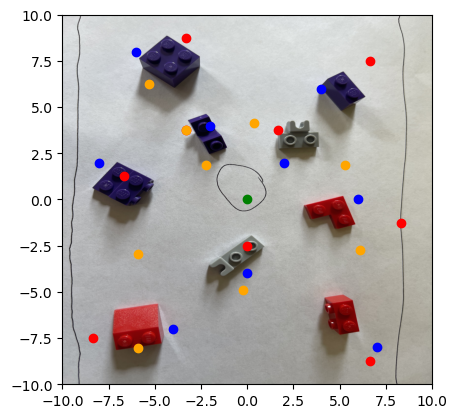

In [6]:
fig, ax = plt.subplots()

print(im.shape)
ax.imshow(im, extent=[-10, 10, -10, 10],aspect='equal')
ax.plot(0,0,'o',color='green')
ax.plot(gem_x_points, gem_y_points, 'o', color='red')
ax.plot(claude_x_points, claude_y_points, 'o', color='blue')
ax.plot(gpt_x_points, gpt_y_points, 'o', color='orange')
plt.show()
# plt.plot(x_points, y_points, 'o')W

In [7]:
# Grid boxes
# Continuing with claude!

points = [C_robot,C_P1,C_P2,C_P3,C_P4,C_R1,C_R2,C_R3,C_G1,C_G2]


def normaliser(x,oldmin,oldmax,newmin,newmax):
    normalised = ((x - oldmin) / (oldmax - oldmin)) * (newmax - newmin) + newmin
    return normalised

final_locations = []
for point in points:
    x_norm = round(normaliser(point[0],-10,10,0,20))
    y_norm = round(normaliser(point[1],-10,10,0,20))
    final_locations.append([x_norm,y_norm])

# normalized_value = ((x - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min


In [8]:
#Unified Planning Object Locations

Location = UserType('Location')
Bricks = UserType('Bricks')
brick_at = unified_planning.model.Fluent('brick_at', BoolType(), l=Location)



In [18]:
#Create Grid Squares
locs = []
for y in range(20):
    for x in range(20):
        loc = f'loc-{x},{y}'
        locs.append(loc)
locations = [unified_planning.model.Object(l,Location) for l in locs]


In [21]:
#Create Brick Objects

seperate_bricks = ['P1','P2','P3','P4','R1','R2','R3','G1','G2']

bricks = [unified_planning.model.Object(b,Bricks) for b in seperate_bricks]




In [30]:

brick_at = unified_planning.model.Fluent('brick_at', BoolType(), brick = Bricks, loc = Location)
on = unified_planning.model.Fluent('on', BoolType(), brick_one = Bricks, brick_two = Bricks, loc = Location)
problem = unified_planning.model.Problem('LegoScatter')
problem.add_fluent(brick_at, default_initial_value=False)

bool brick_at[brick=Bricks, loc=Location]

In [32]:
move = unified_planning.model.InstantaneousAction('move',brick = Bricks, l_from=Location, l_to=Location)
curr_brick = move.parameter('brick')
l_from = move.parameter('l_from')
l_to = move.parameter('l_to')
move.add_precondition(brick_at(curr_brick, l_from))
# move.add_precondition(robot_at(l_from))
move.add_effect(brick_at(curr_brick, l_from), False)
move.add_effect(brick_at(curr_brick, l_to), True)

In [ ]:
move_on = unified_planning.model.InstantaneousAction('move',brick_one = Bricks, brick_two = Bricks, l_from=Location, l_to=Location)
curr_brick = move.parameter('brick')
l_from = move.parameter('l_from')
l_to = move.parameter('l_to')
move.add_precondition(brick_at(curr_brick, l_from))
# move.add_precondition(robot_at(l_from))
move.add_effect(brick_at(curr_brick, l_from), False)
move.add_effect(brick_at(curr_brick, l_to), True)

In [27]:
#Initialise Locations
# print(final_locations[1:])
# print(bricks)
for i in range(len(bricks)):
    loc = Object(f'loc-{final_locations[i+1][0]},{final_locations[i+1][1]}',Location)
    # print(loc)
    problem.set_initial_value(brick_at(bricks[i],loc),True)
